## Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from interpretable_ml_utils import *

path = Path("/Users/fra/Work/fra")

## Loading and processing the UCI adult dataset

In [ ]:
fname = path/"adult.feather"
if not os.path.isfile(fname):
    cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
            'marital_status', 'occupation', 'relationship', 'race', 'sex', 
            'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                     names=cols)
    df.to_feather(fname)
else: 
    df = pd.read_feather(fname)

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
features = ['age', 'workclass', 'education', 'marital_status', 'occupation', 
            'relationship', 'race', 'sex', 'hours_per_week', 'native_country',
            'capital_gain', 'capital_loss']

In [ ]:
for c in features+['income']:
    if not is_numeric_dtype(df[c]):
        df[c] = df[c].str.strip()
        df = reduce_cardinality(df, c)

In [ ]:
raw_train, raw_valid = train_test_split(df[features+['income']], train_size=0.8, random_state=1234)
raw_train.shape, raw_valid.shape

((26048, 13), (6513, 13))

In [ ]:
display_all(raw_train.head())

,29187,23535,14450,2727,18474
age,31,59,21,32,20
workclass,Private,?,Private,Private,Private
education,HS-grad,Bachelors,HS-grad,HS-grad,Some-college
marital_status,Divorced,Married-civ-spouse,Never-married,Never-married,Never-married
occupation,Other-service,?,Adm-clerical,Adm-clerical,Adm-clerical
relationship,Unmarried,Husband,Not-in-family,Not-in-family,Own-child
race,White,White,White,White,White
sex,Female,Male,Female,Female,Female
hours_per_week,99,40,40,40,20
native_country,United-States,United-States,United-States,United-States,United-States


In [ ]:
raw_train = raw_train.sample(10000)

In [ ]:
cats = train_cats(raw_train)
X_train, y_train, nas = proc_df(raw_train, y_fld='income', max_n_cat=None)

apply_cats(raw_valid, raw_train)
X_valid, y_valid, _ = proc_df(raw_valid, y_fld='income', na_dict=nas, max_n_cat=None)
feats = list(X_train.columns)

raw_train.shape, raw_valid.shape, X_train.shape, X_valid.shape

((10000, 13), (6513, 13), (10000, 12), (6513, 12))

## Estimating Train/Test set sizes

In [ ]:
y = pd.Series(y_train)
X = X_train.reset_index(drop=True)

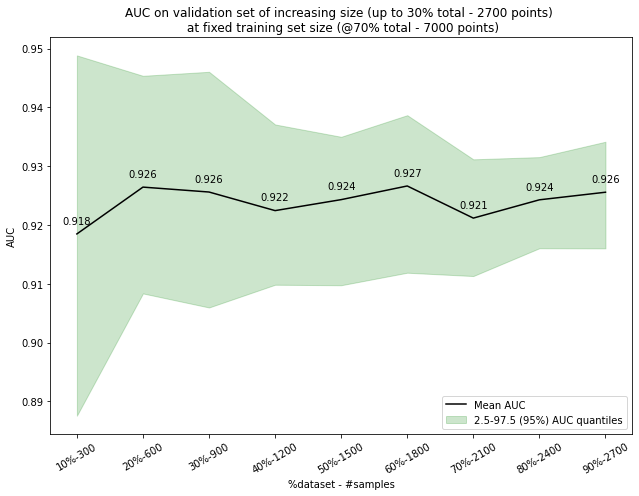

,Sample,Valid_size,Train_size,Bootstraps,AUC_mean,AUC_std,AUC_975,AUC_025,975VSmean_%,025VSmean_%
Perc-Sample,,,,,,,,,,
10%-300,300,300,7000,30,0.918,0.018,0.949,0.888,3.306,-3.366
20%-600,600,600,7000,30,0.926,0.011,0.945,0.908,2.043,-1.952
30%-900,900,900,7000,30,0.926,0.011,0.946,0.906,2.209,-2.122
40%-1200,1200,1200,7000,30,0.922,0.007,0.937,0.910,1.588,-1.367
50%-1500,1500,1500,7000,30,0.924,0.007,0.935,0.910,1.156,-1.575
60%-1800,1800,1800,7000,30,0.927,0.007,0.939,0.912,1.299,-1.592
70%-2100,2100,2100,7000,30,0.921,0.006,0.931,0.911,1.085,-1.070
80%-2400,2400,2400,7000,30,0.924,0.005,0.932,0.916,0.786,-0.891
90%-2700,2700,2700,7000,30,0.926,0.005,0.934,0.916,0.928,-1.031


In [ ]:
df, _ = estimate_impact_size(what="test", X=X, y=y, grid = np.arange(0.1, 1, 0.1), reps=range(50))

In [ ]:
df, _ = estimate_impact_size(what="train", X=X, y=y, grid = np.arange(0.1, 1, 0.1), reps=range(30))